In [12]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt


data = [
    # Día 1 - Lunes 
    ["Entendimiento del negocio + CRISP-DM", "Persona C", "2025-07-07 09:00", 2],
    ["Scraping + selección por narrativa", "Persona A", "2025-07-07 09:00", 3],
    ["Preprocesamiento (limpieza y formateo)", "Persona C", "2025-07-07 09:00", 3],
    ["EDA (visualización + clusters)", "Persona A", "2025-07-07 11:00", 3],
    ["EDA (análisis por narrativa)", "Persona B", "2025-07-07 13:00", 2],
    ["Feature Engineering (RSI, MACD...)", "Rody", "2025-07-07 13:00", 3],
    ["EDA extra + revisión features", "Persona C", "2025-07-07 14:00", 1.5],
    ["Redacción preliminar informe (secciones 1-3)", "Persona B", "2025-07-07 15:00", 2.5],
    
    # Día 2 - Martes
    ["Modelo Predictivo (entrenamiento + métricas)", "Persona A", "2025-07-08 09:00", 3],
    ["Detección de Anomalías", "Rody", "2025-07-08 09:00", 3.5],
    ["Tuning con Optuna", "Rody", "2025-07-08 12:30", 2.5],
    ["GUI Básica (Streamlit/Gradio)", "Persona B", "2025-07-08 10:00", 3.5],
    ["Informe final (secciones 4-7)", "Persona C", "2025-07-08 13:00", 3],
    ["Revisión final + GitHub + empaquetado", "Todos", "2025-07-08 16:00", 2],
]


# Crear DataFrame
df = pd.DataFrame(data, columns=["Tarea", "Responsable", "Inicio", "Duración (h)"])
df["Inicio"] = pd.to_datetime(df["Inicio"])
df["Fin"] = df["Inicio"] + pd.to_timedelta(df["Duración (h)"], unit="h")

df


,Tarea,Responsable,Inicio,Duración (h),Fin
0,Entendimiento del negocio + CRISP-DM,Persona C,2025-07-07 09:00:00,2.0,2025-07-07 11:00:00
1,Scraping + selección por narrativa,Persona A,2025-07-07 09:00:00,3.0,2025-07-07 12:00:00
2,Preprocesamiento (limpieza y formateo),Persona C,2025-07-07 09:00:00,3.0,2025-07-07 12:00:00
3,EDA (visualización + clusters),Persona A,2025-07-07 11:00:00,3.0,2025-07-07 14:00:00
4,EDA (análisis por narrativa),Persona B,2025-07-07 13:00:00,2.0,2025-07-07 15:00:00
5,"Feature Engineering (RSI, MACD...)",Rody,2025-07-07 13:00:00,3.0,2025-07-07 16:00:00
6,EDA extra + revisión features,Persona C,2025-07-07 14:00:00,1.5,2025-07-07 15:30:00
7,Redacción preliminar informe (secciones 1-3),Persona B,2025-07-07 15:00:00,2.5,2025-07-07 17:30:00
8,Modelo Predictivo (entrenamiento + métricas),Persona A,2025-07-08 09:00:00,3.0,2025-07-08 12:00:00
9,Detección de Anomalías,Rody,2025-07-08 09:00:00,3.5,2025-07-08 12:30:00


In [13]:

# Gantt
fig = px.timeline(df, x_start="Inicio", x_end="Fin", y="Responsable", color="Tarea", title="Cronograma Gantt detallado por hora")
fig.update_yaxes(categoryorder="total ascending")
fig.update_layout(xaxis_title="Hora", yaxis_title="Responsable")
fig.show()


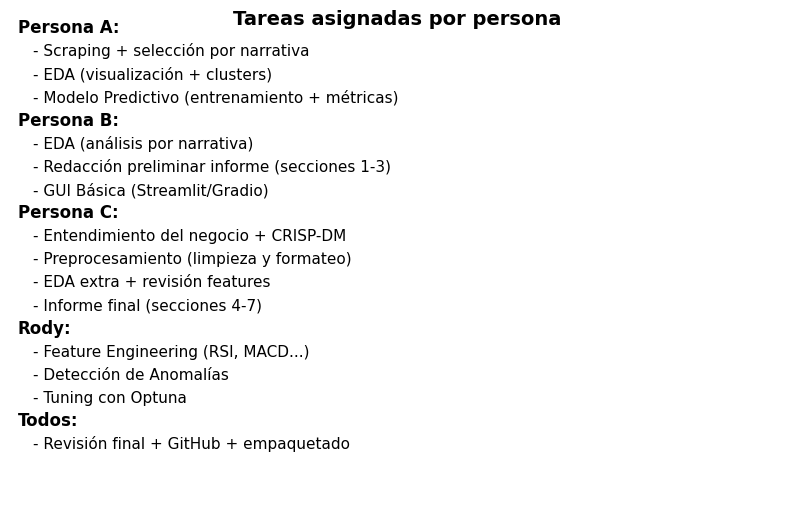

In [14]:
# Agrupar tareas por persona
tareas_grouped = df.groupby("Responsable")["Tarea"].apply(list)

# Crear gráfico de texto por persona
fig, ax = plt.subplots(figsize=(10, 6))
ax.axis("off")
ax.set_title("Tareas asignadas por persona", fontsize=14, fontweight="bold")

# Posiciones para texto
y = 1.0
for persona, tareas in tareas_grouped.items():
    ax.text(0.01, y, f"{persona}:", fontsize=12, fontweight="bold")
    for tarea in tareas:
        y -= 0.05
        ax.text(0.03, y, f"- {tarea}", fontsize=11)
    y -= 0.05  # espacio entre personas

plt.show()


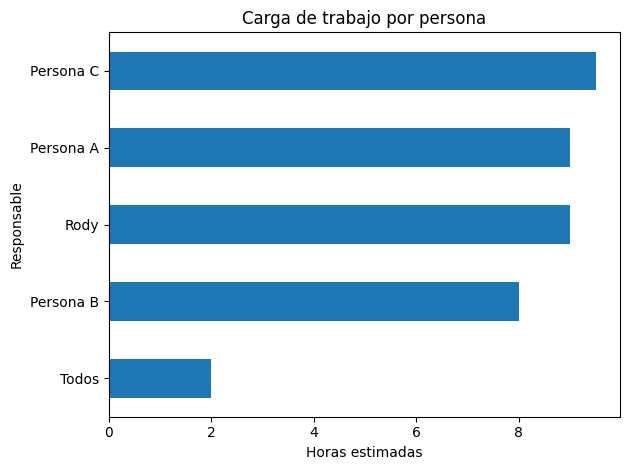

In [15]:
# Horas totales por persona
df_sum = df.groupby("Responsable")["Duración (h)"].sum().sort_values()

df_sum.plot(kind="barh", title="Carga de trabajo por persona")
plt.xlabel("Horas estimadas")
plt.tight_layout()
plt.show()


In [16]:
dot_clean = Digraph("TF_Cripto_Clean", format="png")
dot_clean.attr(rankdir='TB', size='8,10')
dot_clean.attr('node', shape='box', style='filled', fontname='Helvetica', fontsize='10', fillcolor='#D6EAF8')

# Fases del pipeline (basado en CRISP-DM adaptado al proyecto)
dot_clean.node("NEG", "Entendimiento del negocio")
dot_clean.node("DAT", "Adquisición y\npreprocesamiento de datos")
dot_clean.node("EDA", "Análisis exploratorio (EDA)")
dot_clean.node("FEAT", "Feature engineering")
dot_clean.node("MOD", "Modelado predictivo")
dot_clean.node("ANO", "Detección de anomalías")
dot_clean.node("TUNE", "Optimización de modelos (Optuna)")
dot_clean.node("GUI", "Despliegue en GUI")
dot_clean.node("REP", "Informe final y entrega")

# Relaciones entre nodos
dot_clean.edges([
    ("NEG", "DAT"),
    ("DAT", "EDA"),
    ("EDA", "FEAT"),
    ("FEAT", "MOD"),
    ("MOD", "ANO"),
    ("ANO", "TUNE"),
    ("TUNE", "GUI"),
    ("GUI", "REP")
])

dot_clean.render("TF_Cripto_Graph", cleanup=False)



'TF_Cripto_Graph.png'

In [17]:
!pip install graphviz